Imports dan setup

In [1]:
# Cell 1: Setup environment & import
import sys, os
import pandas as pd

# Pastikan notebook yang dijalankan masih di project/notebooks/
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

# Import modul dari src
from src.crypto.keygen    import generate_rsa_keys
from src.crypto.encrypt   import rsa_encrypt
from src.crypto.decrypt   import rsa_decrypt
from src.utils.benchmarks import benchmark_rsa

# Paths untuk kunci
KEYS_DIR     = os.path.join(PROJECT_ROOT, "keys")
PRIVATE_PATH = os.path.join(KEYS_DIR, "private.pem")
PUBLIC_PATH  = os.path.join(KEYS_DIR, "public.pem")

# Generate RSA key pair (bikin folder keys otomatis jika perlu)
priv, pub = generate_rsa_keys(2048, PRIVATE_PATH, PUBLIC_PATH)
print("Keys ready:", priv, pub)


Keys ready: d:\VSCode\cryptography\project\keys\private.pem d:\VSCode\cryptography\project\keys\public.pem


Definisi ukuran pesan (KB) dan eksperimen

In [2]:
# Cell 2: Benchmark RSA untuk berbagai ukuran pesan (bytes) dan simpan ke CSV
message_sizes = [50, 100, 150, 190]  # ukuran plaintext dalam bytes
results = []

for size in message_sizes:
    msg   = b'A' * size
    t_enc = benchmark_rsa(rsa_encrypt, msg, pub)
    ct    = rsa_encrypt(msg, pub)
    t_dec = benchmark_rsa(rsa_decrypt, ct, priv)
    results.append({
        'message_size_bytes': size,
        'encrypt_time_ms':   t_enc,
        'decrypt_time_ms':   t_dec
    })

rsa_df = pd.DataFrame(results)

# Simpan ke folder benchmarks di root proyek
BENCH_DIR = os.path.join(PROJECT_ROOT, 'benchmarks')
os.makedirs(BENCH_DIR, exist_ok=True)
csv_path = os.path.join(BENCH_DIR, 'rsa_time.csv')
rsa_df.to_csv(csv_path, index=False)

# Tampilkan hasil
rsa_df


,message_size_bytes,encrypt_time_ms,decrypt_time_ms
0,50,7.01222,95.80694
1,100,2.13206,95.86492
2,150,2.74718,92.45060
3,190,2.33142,91.33002


Plot grafik

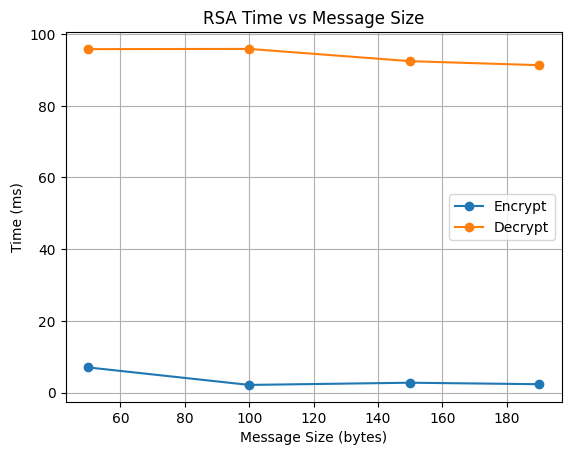

In [3]:
# Cell 3: Visualisasi hasil benchmark
import matplotlib.pyplot as plt

plt.plot(rsa_df['message_size_bytes'], rsa_df['encrypt_time_ms'], marker='o', label='Encrypt')
plt.plot(rsa_df['message_size_bytes'], rsa_df['decrypt_time_ms'], marker='o', label='Decrypt')
plt.title('RSA Time vs Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid(True)
plt.show()
